<a href="https://colab.research.google.com/github/CarlosCR07/Compilador/blob/main/naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión del modelo Naive Bayes: 1.00
Matriz de Confusión:
[[ 270    0    0    0    0    0    0    0    0    0    0    0]
 [   0 6189    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1060    0    0    0    0   39    0    0    0    0]
 [   0    0    0  482    0    0    0    0    0    0    0    0]
 [   0    0    0    0  609    0    0    0    0    0    0    0]
 [   0    0    0    0    0   84    0    0    0    0    0    0]
 [   0    0    0    0    0    0  231    0    0    0    0    0]
 [   0    0    0    0    0   14    0  580    0    0    2    0]
 [   0    0    0    0    0    0    0    0  187    4    0    0]
 [   0    0    0    0    0    0    0    0    0 5219    0    0]
 [   0    0    0    0    0    0    0    0    0    0  527    0]
 [   0    0    0    0    0    0    0    0    0    0    0 2174]]


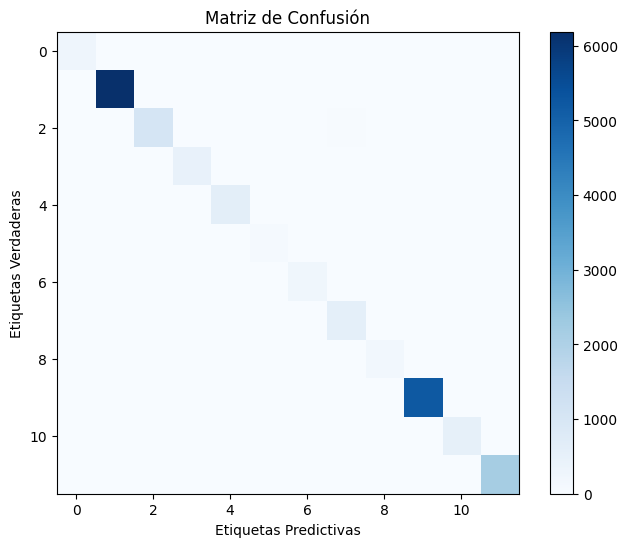

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Cargar los datos desde un archivo CSV
data = pd.read_csv("transacciones.csv", encoding='latin1')

X = data[['Descripcion', 'Marca']] #Columnas categóricas
y = data['Sector'] #Target a predecir

# Codificar las características categóricas usando LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo Naive Bayes categórico
naive_bayes = CategoricalNB()
naive_bayes.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Naive Bayes: {accuracy:.2f}')
# Crear una matriz de confusión para evaluar el rendimiento del modelo
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(confusion)

# Visualizar los resultados (matriz de confusión)
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Etiquetas Predictivas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# ***FRONTERA DE DECISIÓN***

In [ ]:
# Crear y ajustar el modelo Naive Bayes categórico
naive_bayes = CategoricalNB()
naive_bayes.fit(X_train, y_train)

# Visualizar la frontera de decisión
x_min, x_max = X_encoded.iloc[:, 0].min() - 1, X_encoded.iloc[:, 0].max() + 1
y_min, y_max = X_encoded.iloc[:, 1].min() - 1, X_encoded.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = naive_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_encoded.iloc[:, 0], X_encoded.iloc[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('Descripción')
plt.ylabel('Marca')
plt.title('Frontera de Decisión Naive Bayes')
plt.show()

NameError: ignored